In [441]:
# [1] Load articles datasets

import pandas as pd

# Read Excel files into DataFrames
articles = pd.read_csv("company_articles_updated.csv")
articles

,company_code,url,title,publication_date,article
0,4998306,https://www-capitaliq-spglobal-com.uaccess.uni...,European banks' capital offerings rebound to b...,"Wednesday, July 19, 2023 5:48 AM ET",Capital offerings by banks in Europe recovered...
1,4349418,https://www-capitaliq-spglobal-com.uaccess.uni...,Condor Gold Says It Has Received Offers for Ni...,"Friday, July 21, 2023 4:02 AM ET",By Christian Moess Laursen\nCondor Gold said F...
2,6613555,https://www-capitaliq-spglobal-com.uaccess.uni...,*Calidus Resources Price Target Raised 3.6% to...,"Wednesday, April 17, 2024 11:05 PM ET","(END) Dow Jones Newswires\nApril 17, 2024 23:0..."
3,6613555,https://www-capitaliq-spglobal-com.uaccess.uni...,*Calidus Resources Price Target Cut 10% to A$0...,"Thursday, February 29, 2024 4:12 PM ET","(END) Dow Jones Newswires\nFebruary 29, 2024 1..."
4,6613555,https://www-capitaliq-spglobal-com.uaccess.uni...,*Calidus Resources Upgraded to Speculative Buy...,"Wednesday, November 15, 2023 12:48 AM ET","(END) Dow Jones Newswires\nNovember 15, 2023 0..."
...,...,...,...,...,...
4300,4349065,https://www-capitaliq-spglobal-com.uaccess.uni...,"UK Growth Is a Headache for the BOE; Friday, A...","Friday, August 11, 2023 6:31 AM ET",UK Growth Is a Headache for the BOE\n0850 GM...
4301,4349065,https://www-capitaliq-spglobal-com.uaccess.uni...,FTSE 100 Falls On Trader Caution After Strong ...,"Friday, August 11, 2023 4:44 AM ET",FTSE 100 Falls On Trader Caution After Stron...
4302,4349065,https://www-capitaliq-spglobal-com.uaccess.uni...,FTSE 100 Seen Opening Lower as Traders Weigh U...,"Friday, August 11, 2023 2:44 AM ET",FTSE 100 Seen Opening Lower as Traders Weigh...
4303,4349065,https://www-capitaliq-spglobal-com.uaccess.uni...,"Chaarat Gold Holdings' Kapan Production Falls,...","Friday, August 11, 2023 2:23 AM ET",By Michael Susin\nChaarat Gold Holdings has ...


In [442]:
# [2.1] We need to convert the date string into dates

import numpy as np

type(articles['publication_date'][1])

str

In [443]:
# [2.2] Parse the publication_date column to date format (also remove NaN dates)
articles['publication_date'] = pd.to_datetime(articles['publication_date'], format='%A, %B %d, %Y %I:%M %p ET').dt.date
articles = articles.dropna(subset=['publication_date'])
articles

,company_code,url,title,publication_date,article
0,4998306,https://www-capitaliq-spglobal-com.uaccess.uni...,European banks' capital offerings rebound to b...,2023-07-19,Capital offerings by banks in Europe recovered...
1,4349418,https://www-capitaliq-spglobal-com.uaccess.uni...,Condor Gold Says It Has Received Offers for Ni...,2023-07-21,By Christian Moess Laursen\nCondor Gold said F...
2,6613555,https://www-capitaliq-spglobal-com.uaccess.uni...,*Calidus Resources Price Target Raised 3.6% to...,2024-04-17,"(END) Dow Jones Newswires\nApril 17, 2024 23:0..."
3,6613555,https://www-capitaliq-spglobal-com.uaccess.uni...,*Calidus Resources Price Target Cut 10% to A$0...,2024-02-29,"(END) Dow Jones Newswires\nFebruary 29, 2024 1..."
4,6613555,https://www-capitaliq-spglobal-com.uaccess.uni...,*Calidus Resources Upgraded to Speculative Buy...,2023-11-15,"(END) Dow Jones Newswires\nNovember 15, 2023 0..."
...,...,...,...,...,...
4300,4349065,https://www-capitaliq-spglobal-com.uaccess.uni...,"UK Growth Is a Headache for the BOE; Friday, A...",2023-08-11,UK Growth Is a Headache for the BOE\n0850 GM...
4301,4349065,https://www-capitaliq-spglobal-com.uaccess.uni...,FTSE 100 Falls On Trader Caution After Strong ...,2023-08-11,FTSE 100 Falls On Trader Caution After Stron...
4302,4349065,https://www-capitaliq-spglobal-com.uaccess.uni...,FTSE 100 Seen Opening Lower as Traders Weigh U...,2023-08-11,FTSE 100 Seen Opening Lower as Traders Weigh...
4303,4349065,https://www-capitaliq-spglobal-com.uaccess.uni...,"Chaarat Gold Holdings' Kapan Production Falls,...",2023-08-11,By Michael Susin\nChaarat Gold Holdings has ...


In [444]:
# [2.3] ... and also account for some articles being published on non-trading dates 
articles_1 = articles.copy()

for index, row in articles_1.iterrows():
    if row['publication_date'].weekday() + 1 == 6:    # Saturday
        articles_1.loc[index, 'publication_date'] = row['publication_date'] + pd.Timedelta(days=2)
    elif row['publication_date'].weekday() + 1 == 7:  # Sunday
        articles_1.loc[index, 'publication_date'] = row['publication_date'] + pd.Timedelta(days=1)

articles_1

,company_code,url,title,publication_date,article
0,4998306,https://www-capitaliq-spglobal-com.uaccess.uni...,European banks' capital offerings rebound to b...,2023-07-19,Capital offerings by banks in Europe recovered...
1,4349418,https://www-capitaliq-spglobal-com.uaccess.uni...,Condor Gold Says It Has Received Offers for Ni...,2023-07-21,By Christian Moess Laursen\nCondor Gold said F...
2,6613555,https://www-capitaliq-spglobal-com.uaccess.uni...,*Calidus Resources Price Target Raised 3.6% to...,2024-04-17,"(END) Dow Jones Newswires\nApril 17, 2024 23:0..."
3,6613555,https://www-capitaliq-spglobal-com.uaccess.uni...,*Calidus Resources Price Target Cut 10% to A$0...,2024-02-29,"(END) Dow Jones Newswires\nFebruary 29, 2024 1..."
4,6613555,https://www-capitaliq-spglobal-com.uaccess.uni...,*Calidus Resources Upgraded to Speculative Buy...,2023-11-15,"(END) Dow Jones Newswires\nNovember 15, 2023 0..."
...,...,...,...,...,...
4300,4349065,https://www-capitaliq-spglobal-com.uaccess.uni...,"UK Growth Is a Headache for the BOE; Friday, A...",2023-08-11,UK Growth Is a Headache for the BOE\n0850 GM...
4301,4349065,https://www-capitaliq-spglobal-com.uaccess.uni...,FTSE 100 Falls On Trader Caution After Strong ...,2023-08-11,FTSE 100 Falls On Trader Caution After Stron...
4302,4349065,https://www-capitaliq-spglobal-com.uaccess.uni...,FTSE 100 Seen Opening Lower as Traders Weigh U...,2023-08-11,FTSE 100 Seen Opening Lower as Traders Weigh...
4303,4349065,https://www-capitaliq-spglobal-com.uaccess.uni...,"Chaarat Gold Holdings' Kapan Production Falls,...",2023-08-11,By Michael Susin\nChaarat Gold Holdings has ...


In [445]:
# [3] Concatenate articles and titles falling on the same dates for the same companies
# Replace NaN values with empty strings
articles_1['title'] = articles_1['title'].fillna('')
articles_1['article'] = articles_1['article'].fillna('')

# Group by 'company_code' and 'publication_date', then concatenate 'title' and 'article'
articles_1 = articles_1.groupby(['company_code', 'publication_date']).agg({
    'title': ' '.join,
    'article': ' '.join
}).reset_index()

articles_1

,company_code,publication_date,title,article
0,100607,2023-08-31,Citigroup's CFO Mark Mason reclaims spot as hi...,After losing his position to Bank of America C...
1,100607,2023-09-14,US bank branch M&A activity muted with only 9 ...,US whole-bank M&A might have sputtered back to...
2,100669,2022-08-02,US bank stocks record best 2022 performance in...,The U.S. banking industry recorded its best st...
3,100669,2022-10-04,Fed's aggressive tightening continues to weigh...,U.S. bank stocks continued to take a beating i...
4,100669,2023-03-02,US bank stocks post nearly flat median return ...,U.S. bank stocks ended February with a median ...
...,...,...,...,...
3699,112934797,2023-10-12,"State of the Pipeline – as of Oct. 11, 2023; R...",This feature has the latest news from the mutu...
3700,112934797,2023-11-09,"State of the Pipeline – as of Nov. 8, 2023; Ro...",This feature has the latest news from the mutu...
3701,112934797,2024-01-05,Luse Gorman dominates 2023 mutual bank convers...,Luse Gorman PC nearly swept the legal counsel ...
3702,112934797,2024-01-10,2023 conversion class features 2nd-largest sta...,The mutual bank conversions that closed in 202...


In [446]:
# [4.1] Load stocks dataset

import pandas as pd

# Read Excel files into DataFrames
stocks = pd.read_csv("stocks.csv")
stocks.head()

,index,Date,Close,Volume,Industry Group,Ticker,Company code
0,0,2024-07-25 22:51:00,0.560000,0.0,NaN,NASDAQCM:LITM,10992240
1,1,2024-07-25 00:00:00,0.515704,1230694.0,308.820563,NASDAQCM:LITM,10992240
2,2,2024-07-24 00:00:00,0.571206,5761410.0,312.439291,NASDAQCM:LITM,10992240
3,3,2024-07-23 00:00:00,0.891722,786094.0,314.341423,NASDAQCM:LITM,10992240
4,4,2024-07-22 00:00:00,0.716205,62807.0,313.255752,NASDAQCM:LITM,10992240


In [447]:
# [4.2] ... to date format
stocks['Date'] = pd.to_datetime(stocks['Date'], format='mixed').dt.date
stocks.head()

,index,Date,Close,Volume,Industry Group,Ticker,Company code
0,0,2024-07-25,0.560000,0.0,NaN,NASDAQCM:LITM,10992240
1,1,2024-07-25,0.515704,1230694.0,308.820563,NASDAQCM:LITM,10992240
2,2,2024-07-24,0.571206,5761410.0,312.439291,NASDAQCM:LITM,10992240
3,3,2024-07-23,0.891722,786094.0,314.341423,NASDAQCM:LITM,10992240
4,4,2024-07-22,0.716205,62807.0,313.255752,NASDAQCM:LITM,10992240


In [448]:
# [5] filter out the companies not included in stocks:
len(stocks['Company code'].unique())

493

In [449]:
# [5] -cont.-
# Filter articles data to keep only those company codes present in stocks data
articles_2 = articles_1[articles_1['company_code'].isin(stocks['Company code'])]
articles_2

,company_code,publication_date,title,article
0,100607,2023-08-31,Citigroup's CFO Mark Mason reclaims spot as hi...,After losing his position to Bank of America C...
1,100607,2023-09-14,US bank branch M&A activity muted with only 9 ...,US whole-bank M&A might have sputtered back to...
2,100669,2022-08-02,US bank stocks record best 2022 performance in...,The U.S. banking industry recorded its best st...
3,100669,2022-10-04,Fed's aggressive tightening continues to weigh...,U.S. bank stocks continued to take a beating i...
4,100669,2023-03-02,US bank stocks post nearly flat median return ...,U.S. bank stocks ended February with a median ...
...,...,...,...,...
3699,112934797,2023-10-12,"State of the Pipeline – as of Oct. 11, 2023; R...",This feature has the latest news from the mutu...
3700,112934797,2023-11-09,"State of the Pipeline – as of Nov. 8, 2023; Ro...",This feature has the latest news from the mutu...
3701,112934797,2024-01-05,Luse Gorman dominates 2023 mutual bank convers...,Luse Gorman PC nearly swept the legal counsel ...
3702,112934797,2024-01-10,2023 conversion class features 2nd-largest sta...,The mutual bank conversions that closed in 202...


In [450]:
# [*] check how many companies have how many articles
# Group by company_code and count the number of articles for each company
company_article_counts = articles_2.groupby('company_code').size().reset_index(name='article_count')

# Get the summary of how many companies have how many articles
summary = company_article_counts.groupby('article_count').size().reset_index(name='number_of_companies')

summary

,article_count,number_of_companies
0,1,174
1,2,58
2,3,32
3,4,31
4,5,23
5,6,17
6,7,19
7,8,19
8,9,11
9,10,11


In [451]:
# [6] Let's assign a group for each cluster

# Group by company_code and count the number of articles for each company
company_article_counts = articles_2.groupby('company_code').size().reset_index(name='article_count')

# Define the function to determine the group
def assign_group(article_count):
    if article_count == 1:
        return 1
    elif 2 <= article_count <= 5:
        return 2
    elif 6 <= article_count <= 15:
        return 3
    else:
        return 4

# Apply the function to the article_count column to create a new group column
company_article_counts['group'] = company_article_counts['article_count'].apply(assign_group)

# Merge the group information back into the original dataframe
articles_3 = articles_2.merge(company_article_counts[['company_code', 'group']], on='company_code', how='left')

# ALSO, ALSO add a unique article identifier (will be needed later):
articles_3['article_code'] = articles_3['company_code'].astype(str) + '_' + articles_3['publication_date'].astype(str)

# Display the first few rows of the updated dataframe
articles_3

,company_code,publication_date,title,article,group,article_code
0,100607,2023-08-31,Citigroup's CFO Mark Mason reclaims spot as hi...,After losing his position to Bank of America C...,2,100607_2023-08-31
1,100607,2023-09-14,US bank branch M&A activity muted with only 9 ...,US whole-bank M&A might have sputtered back to...,2,100607_2023-09-14
2,100669,2022-08-02,US bank stocks record best 2022 performance in...,The U.S. banking industry recorded its best st...,3,100669_2022-08-02
3,100669,2022-10-04,Fed's aggressive tightening continues to weigh...,U.S. bank stocks continued to take a beating i...,3,100669_2022-10-04
4,100669,2023-03-02,US bank stocks post nearly flat median return ...,U.S. bank stocks ended February with a median ...,3,100669_2023-03-02
...,...,...,...,...,...,...
3633,112934797,2023-10-12,"State of the Pipeline – as of Oct. 11, 2023; R...",This feature has the latest news from the mutu...,3,112934797_2023-10-12
3634,112934797,2023-11-09,"State of the Pipeline – as of Nov. 8, 2023; Ro...",This feature has the latest news from the mutu...,3,112934797_2023-11-09
3635,112934797,2024-01-05,Luse Gorman dominates 2023 mutual bank convers...,Luse Gorman PC nearly swept the legal counsel ...,3,112934797_2024-01-05
3636,112934797,2024-01-10,2023 conversion class features 2nd-largest sta...,The mutual bank conversions that closed in 202...,3,112934797_2024-01-10


In [452]:
# [7] Count the number of unique company_codes for each group
unique_company_counts_per_group = articles_3.groupby('group')['company_code'].nunique().reset_index(name='unique_company_count')
unique_company_counts_per_group

,group,unique_company_count
0,1,174
1,2,144
2,3,118
3,4,57


In [453]:
# [7] very good, it looks like we have a good distribution of companies/articles
# ... although, we might want to twitch the distribution a little later
unique_company_counts_per_group = articles_3.groupby('group')['company_code'].count().reset_index(name='unique_company_count')
unique_company_counts_per_group

,group,unique_company_count
0,1,174
1,2,451
2,3,1124
3,4,1889


In [454]:
# [8] Assign a publication_date to the stocks df that will track if that observation should be the beginning of a new delay point
# Create a set of tuples (company_code, publication_date) for fast lookup
article_dates = set(zip(articles_3['company_code'], articles_3['publication_date']))

# Create the new column in the stocks DataFrame
stocks['publication_date'] = stocks.apply(
    lambda row: 1 if (row['Company code'], row['Date']) in article_dates else 0,
    axis=1
)

In [455]:
# [8] check
stocks['article_code'] = stocks['Company code'].astype(str) + "_" + stocks['Date'].astype(str)
stocks.loc[stocks['publication_date'] == 0, 'article_code'] = ""

stocks.head()

,index,Date,Close,Volume,Industry Group,Ticker,Company code,publication_date,article_code
0,0,2024-07-25,0.560000,0.0,NaN,NASDAQCM:LITM,10992240,0,
1,1,2024-07-25,0.515704,1230694.0,308.820563,NASDAQCM:LITM,10992240,0,
2,2,2024-07-24,0.571206,5761410.0,312.439291,NASDAQCM:LITM,10992240,0,
3,3,2024-07-23,0.891722,786094.0,314.341423,NASDAQCM:LITM,10992240,0,
4,4,2024-07-22,0.716205,62807.0,313.255752,NASDAQCM:LITM,10992240,0,


In [456]:
# [*] Perfect
len(stocks[stocks['publication_date'] == 1]['publication_date'])

3638

In [457]:
# ^^^
len(articles_3['publication_date'])

3638

In [502]:
# [9] Now, we create a new column with unique article_codes for each period for each company
stocks2 = stocks.copy()

# Assuming stocks2 DataFrame is already sorted by 'Company code' and 'Date'
# We will create a helper function to apply the filling logic for each company
def fill_article_code(group):
    group['article_code'] = group['article_code'].replace("", pd.NA).bfill().fillna("")  # Forward fill the article codes
    return group  # Return the group sorted by Date in ascending order

# Apply the function to each company group
stocks2 = stocks2.groupby('Company code').apply(fill_article_code).reset_index(drop=True)

# Display the updated DataFrame
stocks2[stocks2['Company code'] == 100607][200:260]


,index,Date,Close,Volume,Industry Group,Ticker,Company code,publication_date,article_code
200,4120,2023-10-19,10.495050,100.0,126.501201,OTCQX:JUVF,100607,0,100607_2023-09-14
201,4121,2023-10-18,10.518244,26108.0,127.547726,OTCQX:JUVF,100607,0,100607_2023-09-14
202,4122,2023-10-17,10.251080,461.0,129.932937,OTCQX:JUVF,100607,0,100607_2023-09-14
203,4123,2023-10-16,10.240560,2090.0,128.279581,OTCQX:JUVF,100607,0,100607_2023-09-14
204,4124,2023-10-13,10.953750,2910.0,127.069482,OTCQX:JUVF,100607,0,100607_2023-09-14
205,4125,2023-10-12,11.847500,4100.0,126.989873,OTCQX:JUVF,100607,0,100607_2023-09-14
206,4126,2023-10-11,11.869200,1149.0,127.806471,OTCQX:JUVF,100607,0,100607_2023-09-14
207,4127,2023-10-10,12.025800,840.0,127.618061,OTCQX:JUVF,100607,0,100607_2023-09-14
208,4128,2023-10-09,12.090825,1772.0,125.932682,OTCQX:JUVF,100607,0,100607_2023-09-14
209,4129,2023-10-06,12.291500,NaN,125.766749,OTCQX:JUVF,100607,0,100607_2023-09-14


In [562]:
# [10] And now, we calculate the number of days when the market had the same publically available information for each trading day
interday_counts = stocks2.groupby('article_code').size().reset_index(name='count')[1:]
interday_counts

,article_code,count
1,100034886_2023-08-29,23
2,100034886_2023-09-29,19
3,100034886_2023-10-26,3
4,100034886_2023-10-31,8
5,100034886_2023-11-10,1
...,...,...
3634,9756394_2023-12-12,6
3635,9756394_2023-12-20,33
3636,9756394_2024-02-05,124
3637,9915809_2023-11-06,168


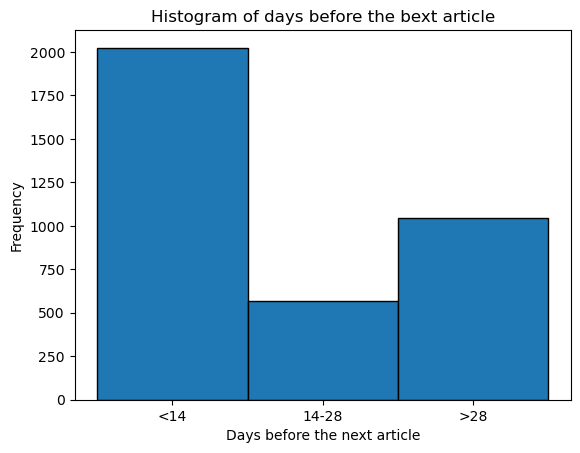

In [504]:
# [11] It seems that more than 2,000 articles are not so useful for the strictest private info leakage impact reduction criteria
# (so that the period before the next article should be more than 2 weeks)

import matplotlib.pyplot as plt

# Plot a histogram of the counts
bins = [0, 14, 28, 1000]
labels = ['<14', '14-28', '>28']

# Create a new column for bin labels
code_counts['bin'] = pd.cut(code_counts['count'], bins=bins, labels=labels, right=False)

# Get the counts for each bin
bin_counts = code_counts['bin'].value_counts().sort_index()

# Plot using bar to ensure equal width bars
plt.bar(labels, bin_counts.values, width=1, edgecolor='black')
plt.xlabel('Days before the next article')
plt.ylabel('Frequency')
plt.title('Histogram of days before the bext article')
plt.show()

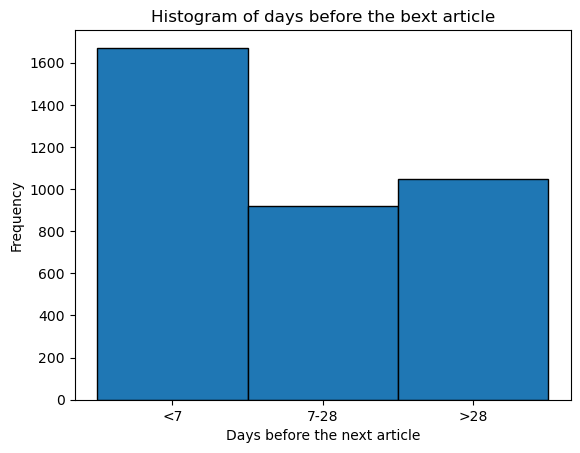

In [505]:
# [11] The less stricter condition of only 7 days gives us ~400 more articles to work with

import matplotlib.pyplot as plt

# Plot a histogram of the counts
bins = [0, 7, 28, 1000]
labels = ['<7', '7-28', '>28']

# Create a new column for bin labels
code_counts['bin'] = pd.cut(code_counts['count'], bins=bins, labels=labels, right=False)

# Get the counts for each bin
bin_counts = code_counts['bin'].value_counts().sort_index()

# Plot using bar to ensure equal width bars
plt.bar(labels, bin_counts.values, width=1, edgecolor='black')
plt.xlabel('Days before the next article')
plt.ylabel('Frequency')
plt.title('Histogram of days before the bext article')
plt.show()

In [578]:
# [12] Calculate returns
stocks3 = stocks2.dropna(subset=['Close'])

def reverse_pct_change(group):
    group = group.iloc[::-1]
    group['returns'] = group['Close'].pct_change()
    return group.iloc[::-1]

# Apply the function to each group
stocks3 = stocks3.groupby('Company code', group_keys=False).apply(reverse_pct_change)
stocks3['returns_abs'] = stocks3['returns'] + 1
stocks3

,index,Date,Close,Volume,Industry Group,Ticker,Company code,publication_date,article_code,returns,returns_abs
0,3920,2024-07-25,10.360125,1150.0,186.132106,OTCQX:JUVF,100607,0,100607_2023-09-14,0.020428,1.020428
1,3921,2024-07-24,10.152726,NaN,184.602780,OTCQX:JUVF,100607,0,100607_2023-09-14,0.000109,1.000109
2,3922,2024-07-23,10.151624,600.0,186.409479,OTCQX:JUVF,100607,0,100607_2023-09-14,-0.001014,0.998986
3,3923,2024-07-22,10.161928,NaN,185.149417,OTCQX:JUVF,100607,0,100607_2023-09-14,0.000327,1.000327
4,3924,2024-07-19,10.158610,NaN,184.466579,OTCQX:JUVF,100607,0,100607_2023-09-14,0.001854,1.001854
...,...,...,...,...,...,...,...,...,...,...,...
385115,308375,2023-10-24,8.405160,2600.0,121.327170,OTCQB:PFSB,112934797,0,112934797_2023-10-12,0.004681,1.004681
385116,308376,2023-10-23,8.366000,7600.0,121.456937,OTCQB:PFSB,112934797,0,112934797_2023-10-12,-0.004343,0.995657
385117,308377,2023-10-20,8.402490,5312.0,123.077113,OTCQB:PFSB,112934797,0,112934797_2023-10-12,-0.001481,0.998519
385118,308378,2023-10-19,8.414950,18323.0,126.501201,OTCQB:PFSB,112934797,0,112934797_2023-10-12,-0.015070,0.984930


In [580]:
# [12] Clean the data
stocks3 = stocks3[stocks3["article_code"] != ""]
stocks3 = stocks3.dropna(subset=['returns'])
stocks3 = stocks3.dropna(subset=['Volume'])
stocks3['sign'] = stocks3['returns'].apply(lambda x: 1 if x >= 0 else -1)
stocks3

,index,Date,Close,Volume,Industry Group,Ticker,Company code,publication_date,article_code,returns,returns_abs,sign
0,3920,2024-07-25,10.360125,1150.0,186.132106,OTCQX:JUVF,100607,0,100607_2023-09-14,0.020428,1.020428,1
2,3922,2024-07-23,10.151624,600.0,186.409479,OTCQX:JUVF,100607,0,100607_2023-09-14,-0.001014,0.998986,-1
6,3926,2024-07-17,10.114370,2148.0,189.017020,OTCQX:JUVF,100607,0,100607_2023-09-14,-0.053565,0.946435,-1
8,3928,2024-07-15,10.655406,350.0,180.627622,OTCQX:JUVF,100607,0,100607_2023-09-14,0.010422,1.010422,1
9,3929,2024-07-12,10.545500,500.0,177.113297,OTCQX:JUVF,100607,0,100607_2023-09-14,-0.003153,0.996847,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
385114,308374,2023-10-25,8.406940,2323.0,120.999855,OTCQB:PFSB,112934797,0,112934797_2023-10-12,0.000212,1.000212,1
385115,308375,2023-10-24,8.405160,2600.0,121.327170,OTCQB:PFSB,112934797,0,112934797_2023-10-12,0.004681,1.004681,1
385116,308376,2023-10-23,8.366000,7600.0,121.456937,OTCQB:PFSB,112934797,0,112934797_2023-10-12,-0.004343,0.995657,-1
385117,308377,2023-10-20,8.402490,5312.0,123.077113,OTCQB:PFSB,112934797,0,112934797_2023-10-12,-0.001481,0.998519,-1


In [695]:
# [13] Remove miniscule price movements
import math

def consecutive_trades(df, interday_counts, days_check_period = 3, min_days = 14):
    

    
    interday_counts_with_periods = pd.DataFrame(columns=['article_code', 'count', 'stabilization_period'])      # [!] empty df to fill in later
    
    for p, i in enumerate(interday_counts[interday_counts['count'] > min_days]['article_code']):                # [!] loop over all article_codes w. >14 days period until the next one

        returns_over_the_days_check_period = []
        returns_cumulative = []
        
        all_returns_for_X = df[df['article_code'] == i]['returns'][::-1]
        
        start_date = 0     # placeholders
        end_date = 0       # placeholders

        for x, return_for_that_day in enumerate(all_returns_for_X):                                              # [!] loop over all dates for that particular article_code (in stocks df)
            start_date = df[df['article_code'] == i]['Date'][::-1].iloc[0]
            returns_over_the_days_check_period.append(return_for_that_day)
            moving_prod = math.prod([num + 1 for num in returns_over_the_days_check_period[-days_check_period:]])   # [!] value of 3-days-moving prod
            returns_cumulative.append(math.prod([num + 1 for num in returns_over_the_days_check_period]))
            if returns_over_the_days_check_period[0] < 0:                                                        # if first day's trade is <0
                if moving_prod >= 1:
                    end_date = df[df['article_code'] == i]['Date'][::-1].iloc[x - 1]                             #># checks if the sign of 3d moving prod changes
            else:                                                                                                # if first day's trade is >=0
                if moving_prod < 1:
                    end_date = df[df['article_code'] == i]['Date'][::-1].iloc[x - 1]                             #># checks if the sign of 3d moving prod changes   
            if end_date == 0 & x == len(all_returns_for_X) - 1:
                end_date = df[df['article_code'] == i]['Date'][::-1].iloc[x]                                     # [!] sets end_date to the final date if there was a consistent incr. or decline over the entire period
            if end_date != 0:
                break  # Exit the loop if end_date has been set

        days = (end_date - start_date + pd.Timedelta(days=1)).days

        
        print(start_date, "   -   ", end_date)
        #print((end_date - start_date + pd.Timedelta(days=1)).days)
        print("\n"*1, returns_cumulative)                                                                        # [!] list of cum product
        print(returns_over_the_days_check_period, "\n"*3)


    interday_counts_with_periods



      
    #return interday_counts_with_periods




consecutive_trades(stocks3, interday_counts[20:30], days_check_period = 3, min_days = 7)


2023-10-12    -    2023-10-12

 [1.0061571125265394, 0.9962766953915325]
[0.006157112526539388, -0.009819954569715628] 



2024-01-26    -    2024-01-30

 [1.3560491015759146, 1.334502418474157, 1.3493975903614457, 1.3539527134222378]
[0.35604910157591463, -0.015889308931894552, 0.011161592276707655, 0.0033756715539798865] 



2024-05-10    -    2024-05-21

 [1.0111575533157082, 1.0118622996529538, 1.0013321044249923, 1.0182653741196832, 1.018044012081831, 1.015535073013949, 1.0095261081250984]
[0.011157553315708224, 0.0006969698588856765, -0.010406747273391859, 0.016910742819351343, -0.00021739130434783593, -0.0024644701389201495, -0.0059170431908539545] 



2024-06-10    -    2024-06-20

 [1.006410771240382, 1.008991299567923, 1.0238972041519834, 1.0339901317386968, 1.0327238488800745, 1.01978915541671]
[0.006410771240382029, 0.0025640905297155125, 0.01477307543726436, 0.009857364143378566, -0.0012246566188141017, -0.012524832729864266] 



2024-01-22    -    2024-01-30

 [1.07678696

In [760]:
# [13] Define a function to calculate the stabilization period
import math

def consecutive_trades(df, interday_counts, days_check_period = 3, min_days = 14):
    

    op = 0
    interday_counts_with_periods = pd.DataFrame(columns=['article_code', 'count', 'stabilization_period'])      # [!] empty df to fill in later

    limited_df = interday_counts
    
    for p, i in enumerate(limited_df['article_code']):                # [!] loop over all article_codes w. >14 days period until the next one
        
        op = op + 1
        returns_over_the_days_check_period = []
        returns_cumulative = []
        
        all_returns_for_X = df[df['article_code'] == i]['returns'][::-1]
        
        start_date = 0     # placeholders
        end_date = 0       # placeholders

        for x, return_for_that_day in enumerate(all_returns_for_X):                                              # [!] loop over all dates for that particular article_code (in stocks df)
            start_date = df[df['article_code'] == i]['Date'][::-1].iloc[0]
            returns_over_the_days_check_period.append(return_for_that_day)
            moving_prod = math.prod([num + 1 for num in returns_over_the_days_check_period[-days_check_period:]])   # [!] value of 3-days-moving prod
            returns_cumulative.append(math.prod([num + 1 for num in returns_over_the_days_check_period]))
            if (returns_over_the_days_check_period[0] < 0):                                                        # if first day's trade is <0
                if (moving_prod >= 1):
                    end_date = df[df['article_code'] == i]['Date'][::-1].iloc[x - 1]                             #># checks if the sign of 3d moving prod changes
            else:                                                                                                # if first day's trade is >=0
                if (moving_prod < 1):
                    end_date = df[df['article_code'] == i]['Date'][::-1].iloc[x - 1]                             #># checks if the sign of 3d moving prod changes   
            if (end_date == 0) & (x == len(all_returns_for_X) - 1):
                end_date = df[df['article_code'] == i]['Date'][::-1].iloc[x - 1]                                     # [!] sets end_date to the final date if there was a consistent incr. or decline over the entire period
            if (end_date != 0):
                break                                                                                            # Exit the loop if end_date has been set

        if (len(df[df['article_code'] == i])) == 0:
            continue
        days = (end_date - start_date + pd.Timedelta(days=1)).days
        if (days < min_days):
            continue
        if (len(df[df['article_code'] == i])) == 0:
            continue
        print("[", op, "] - ", start_date, "   -   ", end_date)
        article_code = limited_df[limited_df['article_code'] == i]['article_code'].tolist()
        count = limited_df[limited_df['article_code'] == i]['count'].tolist()

            
        interday_counts_with_periods.loc[i] = [article_code[0], count[0], days]

        #print(start_date, "   -   ", end_date)
        #print((end_date - start_date + pd.Timedelta(days=1)).days)
        #print("\n"*1, returns_cumulative)                                                                        # [!] list of cum product
        #print(returns_over_the_days_check_period, "\n"*3)


    return interday_counts_with_periods

In [761]:
# [14] Run the function and create a df containing article_codes and their respective stabilization periods (in days)
stabilization_table = consecutive_trades(stocks3, interday_counts, days_check_period = 3, min_days = 7)

[ 6 ] -  2023-11-13    -    2023-11-29
[ 10 ] -  2024-03-27    -    2024-04-19
[ 11 ] -  2024-04-23    -    2024-05-02
[ 18 ] -  2023-08-02    -    2023-08-10
[ 23 ] -  2024-05-10    -    2024-05-21
[ 25 ] -  2024-06-10    -    2024-06-20
[ 26 ] -  2024-01-22    -    2024-01-30
[ 27 ] -  2024-06-17    -    2024-06-25
[ 28 ] -  2023-08-16    -    2023-08-22
[ 29 ] -  2023-09-14    -    2023-09-21
[ 32 ] -  2023-09-21    -    2023-10-03
[ 33 ] -  2023-01-19    -    2023-01-30
[ 35 ] -  2024-04-25    -    2024-05-23
[ 36 ] -  2024-05-29    -    2024-06-28
[ 38 ] -  2023-09-14    -    2023-09-21
[ 40 ] -  2022-10-04    -    2022-10-13
[ 42 ] -  2023-07-06    -    2023-07-14
[ 43 ] -  2023-08-31    -    2023-09-08
[ 45 ] -  2024-01-25    -    2024-02-07
[ 60 ] -  2024-01-03    -    2024-01-09
[ 66 ] -  2022-12-13    -    2022-12-19
[ 68 ] -  2024-03-26    -    2024-04-01
[ 69 ] -  2024-04-11    -    2024-04-19
[ 73 ] -  2024-05-28    -    2024-06-17
[ 74 ] -  2024-06-28    -    2024-07-15
[

In [763]:
# [*] So, it seems we have a little over 600 observations (with a restriction that min_days = 7)
stabilization_table

,article_code,count,stabilization_period
100034886_2023-11-13,100034886_2023-11-13,15,17
100034886_2024-03-27,100034886_2024-03-27,19,24
100034886_2024-04-23,100034886_2024-04-23,23,10
1001743_2023-08-02,1001743_2023-08-02,16,9
1001743_2024-05-10,1001743_2024-05-10,18,12
...,...,...,...
8762043_2023-08-14,8762043_2023-08-14,122,17
8999021_2023-08-21,8999021_2023-08-21,30,8
8999021_2024-02-21,8999021_2024-02-21,112,7
9756394_2023-12-20,9756394_2023-12-20,33,16


In [799]:
# [15] Preparing the articles data
# Filter articles data to keep only those company codes present in stabilization_table
articles_4 = articles_3.copy() 
articles_4 = articles_4[articles_4['article_code'].isin(stabilization_table['article_code'])]
articles_4

,company_code,publication_date,title,article,group,article_code
1,100607,2023-09-14,US bank branch M&A activity muted with only 9 ...,US whole-bank M&A might have sputtered back to...,2,100607_2023-09-14
3,100669,2022-10-04,Fed's aggressive tightening continues to weigh...,U.S. bank stocks continued to take a beating i...,3,100669_2022-10-04
5,100669,2023-07-06,US bank stocks log positive median return afte...,US bank stocks recorded their first positive m...,3,100669_2023-07-06
6,100669,2023-08-31,Citigroup's CFO Mark Mason reclaims spot as hi...,After losing his position to Bank of America C...,3,100669_2023-08-31
8,100669,2024-01-25,"Press Release: First US Bancshares, Inc. Repor...",(MORE TO FOLLOW) Dow Jones Newswires\nJanuary ...,3,100669_2024-01-25
...,...,...,...,...,...,...
3568,105712952,2023-09-26,Cleantech Lithium Shares Drop on Shorter-Than-...,1015 GMT - Cleantech Lithium's much-anticipate...,2,105712952_2023-09-26
3601,106265632,2023-10-17,Press Release: Pan American Energy Corp: Explo...,(MORE TO FOLLOW) Dow Jones Newswires\nOctobe...,3,106265632_2023-10-17
3605,106265632,2023-12-20,"Press Release: Pan American Announces $900,000...",(MORE TO FOLLOW) Dow Jones Newswires\nDecemb...,3,106265632_2023-12-20
3608,106265632,2024-03-18,Press Release: Pan American Energy Collaborate...,(MORE TO FOLLOW) Dow Jones Newswires\nMarch ...,3,106265632_2024-03-18


In [800]:
# [16] Clean, tokenize, and lemmatize the article and title texts
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re


# Downloading necessary NLTK data:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


# Define a function to clean, tokenize, and lemmatize the text
def clean_tokenize_lemmatize(text):

    text = text.lower()                                         # Convert to lowercase
    # Remove financial amounts and dates
    text = re.sub(r'\b\d+(?:,\d{3})*(?:\.\d+)?\b', '', text)    # Removes numbers and financial amounts
    text = re.sub(r'\b\d{1,2}/\d{1,2}/\d{2,4}\b', '', text)     # Removes dates in formats like 12/31/2021
    text = re.sub(r'\b\d{1,2}.\d{1,2}.\d{2,4}\b', '', text)     # Removes dates in formats like 12.31.2021
    text = re.sub(r'\b\d{4}-\d{2}-\d{2}\b', '', text)           # Removes dates in formats like 2021-12-31
    text = re.sub(r'\b\d{2}-\d{2}-\d{4}\b', '', text)           # Removes dates in formats like 12-31-2021

    

    text = text.translate(str.maketrans('', '', string.punctuation))    # Remove punctuation
    words = word_tokenize(text)                                         # Tokenize
    words = [word for word in words if word not in stop_words]          # Remove stop words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]   # Lemmatize

    
    return lemmatized_words




# Apply:
articles_4['cleaned_title_tokens'] = articles_4['title'].apply(clean_tokenize_lemmatize)
articles_4['cleaned_article_tokens'] = articles_4['article'].apply(clean_tokenize_lemmatize)
articles_4
# Save the cleaned, tokenized, and lemmatized data
articles_4.to_csv('cleaned_tokenized_lemmatized_articles_4.csv', index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\panov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\panov\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\panov\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [802]:
# [17] Combine with the y variable
articles_4 = articles_4.merge(stabilization_table, on='article_code', how='left')
articles_4

,company_code,publication_date,title,article,group,article_code,cleaned_title_tokens,cleaned_article_tokens,count_x,stabilization_period_x,count_y,stabilization_period_y
0,100607,2023-09-14,US bank branch M&A activity muted with only 9 ...,US whole-bank M&A might have sputtered back to...,2,100607_2023-09-14,"[u, bank, branch, activity, muted, deal, far, ...","[u, wholebank, might, sputtered, back, life, b...",226,8,226,8
1,100669,2022-10-04,Fed's aggressive tightening continues to weigh...,U.S. bank stocks continued to take a beating i...,3,100669_2022-10-04,"[fed, aggressive, tightening, continues, weigh...","[u, bank, stock, continued, take, beating, sep...",107,10,107,10
2,100669,2023-07-06,US bank stocks log positive median return afte...,US bank stocks recorded their first positive m...,3,100669_2023-07-06,"[u, bank, stock, log, positive, median, return...","[u, bank, stock, recorded, first, positive, me...",40,9,40,9
3,100669,2023-08-31,Citigroup's CFO Mark Mason reclaims spot as hi...,After losing his position to Bank of America C...,3,100669_2023-08-31,"[citigroups, cfo, mark, mason, reclaims, spot,...","[losing, position, bank, america, corp, alasta...",54,9,54,9
4,100669,2024-01-25,"Press Release: First US Bancshares, Inc. Repor...",(MORE TO FOLLOW) Dow Jones Newswires\nJanuary ...,3,100669_2024-01-25,"[press, release, first, u, bancshares, inc, re...","[follow, dow, jones, newswires, january, et, g...",131,14,131,14
...,...,...,...,...,...,...,...,...,...,...,...,...
614,105712952,2023-09-26,Cleantech Lithium Shares Drop on Shorter-Than-...,1015 GMT - Cleantech Lithium's much-anticipate...,2,105712952_2023-09-26,"[cleantech, lithium, share, drop, shorterthane...","[gmt, cleantech, lithium, muchanticipated, sco...",218,8,218,8
615,106265632,2023-10-17,Press Release: Pan American Energy Corp: Explo...,(MORE TO FOLLOW) Dow Jones Newswires\nOctobe...,3,106265632_2023-10-17,"[press, release, pan, american, energy, corp, ...","[follow, dow, jones, newswires, october, et, g...",11,14,11,14
616,106265632,2023-12-20,"Press Release: Pan American Announces $900,000...",(MORE TO FOLLOW) Dow Jones Newswires\nDecemb...,3,106265632_2023-12-20,"[press, release, pan, american, announces, cha...","[follow, dow, jones, newswires, december, et, ...",10,8,10,8
617,106265632,2024-03-18,Press Release: Pan American Energy Collaborate...,(MORE TO FOLLOW) Dow Jones Newswires\nMarch ...,3,106265632_2024-03-18,"[press, release, pan, american, energy, collab...","[follow, dow, jones, newswires, march, et, gmt...",79,15,79,15


In [875]:
# Random Forest Regression
# Random Forests are an ensemble learning method that combines multiple decision trees to improve predictive performance.
# They handle high-dimensional data well and are less likely to overfit (big lie, this model faired worse than all others) 
# compared to single decision trees due to their use of bootstrapping and feature randomness.

# n_estimators = 100: This parameter specifies the number of trees in the forest. 100 is a standard balance b.w. performance/computational efficiency
# R2 maximized

In [804]:
# [18] Model time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# [18.1] Splitting the data:
X_title = articles_4['cleaned_title_tokens'].apply(lambda x: ' '.join(x))
X_article = articles_4['cleaned_article_tokens'].apply(lambda x: ' '.join(x))
y = articles_4['stabilization_period_x']

X_title_train, X_title_test, y_train, y_test = train_test_split(X_title, y, test_size=0.3, random_state=42)
X_article_train, X_article_test, _, _ = train_test_split(X_article, y, test_size=0.3, random_state=42)

In [805]:
# [18.2] Transforming texts into numerical format:

vectorizer = CountVectorizer()

X_title_train_vec = vectorizer.fit_transform(X_title_train)
X_title_test_vec = vectorizer.transform(X_title_test)

X_article_train_vec = vectorizer.fit_transform(X_article_train)
X_article_test_vec = vectorizer.transform(X_article_test)

In [806]:
# [18.3] Random forest training:
model_title = RandomForestRegressor(n_estimators = 100, random_state = 42)
model_article = RandomForestRegressor(n_estimators = 100, random_state = 42)

model_title.fit(X_title_train_vec, y_train)
model_article.fit(X_article_train_vec, y_train)

RandomForestRegressor(random_state=42)

In [807]:
# [18.4] Run and check how accurate it is:
y_title_train_pred = model_title.predict(X_title_train_vec)
y_article_train_pred = model_article.predict(X_article_train_vec)

title_train_mse = mean_squared_error(y_train, y_title_train_pred)
article_train_mse = mean_squared_error(y_train, y_article_train_pred)

title_train_r2 = r2_score(y_train, y_title_train_pred)
article_train_r2 = r2_score(y_train, y_article_train_pred)

print(f"Title Model - Training MSE: {title_train_mse}, R2: {title_train_r2}")
print(f"Article Model - Training MSE: {article_train_mse}, R2: {article_train_r2}")

Title Model - Training MSE: 8.234510940751127, R2: 0.830217417550581
Article Model - Training MSE: 17.11030703352929, R2: 0.6472125502586226


In [808]:
# [*] Well, R2 are high for training, hopefully it will show similar results for the test data:
y_title_test_pred = model_title.predict(X_title_test_vec)
y_article_test_pred = model_article.predict(X_article_test_vec)

title_test_mse = mean_squared_error(y_test, y_title_test_pred)
article_test_mse = mean_squared_error(y_test, y_article_test_pred)

title_test_r2 = r2_score(y_test, y_title_test_pred)
article_test_r2 = r2_score(y_test, y_article_test_pred)

print(f"Title Model - Test MSE: {title_test_mse}, R2: {title_test_r2}")
print(f"Article Model - Test MSE: {article_test_mse}, R2: {article_test_r2}")

Title Model - Test MSE: 55.320083607712796, R2: -0.11156235969658646
Article Model - Test MSE: 59.21577049870747, R2: -0.1898395174807328


In [868]:
# [*] Literally couldn't have been worse
# Let's try optimizing the number of estimators and depth in our random forest

In [873]:
# Optimized Random Forest (we use Grid Search)
# Hyperparameter tuning using Grid Search hoping for better performance (spoiler: it's still bad)
# Use a wider range of parameters to Hail Mary a decent model (failed)

# n_estimators: 100 and now also 200 and 300
# max_depth: We tested values of 10, 20, 30 (and -) controls the depth of the trees (more would overfit).
# min_samples_split / min_samples_leaf: control the min number of samples required to split an internal node and 
#     the min number of samples required to be at a leaf node, respectively. We used values of 2, 5, and 10 to balance complexity/overfitting.
# bootstrap: both True and False
#                   (resampling with replacement from the original dataset)
# R2 maximized

In [812]:
# [19] First, we'll TF-IDF transform:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features for computational efficiency (I don't understand this recommendation, but OK)

X_title_train_tfidf = tfidf_vectorizer.fit_transform(X_title_train)
X_title_test_tfidf = tfidf_vectorizer.transform(X_title_test)

X_article_train_tfidf = tfidf_vectorizer.fit_transform(X_article_train)
X_article_test_tfidf = tfidf_vectorizer.transform(X_article_test)

In [813]:
# [20] Hyperparameter Tuning for RandomForestRegressor:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_title = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                                 param_grid=param_grid,
                                 cv=5,
                                 n_jobs=-1,
                                 scoring='r2',
                                 verbose=2)
grid_search_article = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_grid=param_grid,
                                   cv=5,
                                   n_jobs=-1,
                                   scoring='r2',
                                   verbose=2)

grid_search_title.fit(X_title_train_tfidf, y_train)
grid_search_article.fit(X_article_train_tfidf, y_train)

best_model_title = grid_search_title.best_estimator_
best_model_article = grid_search_article.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [814]:
# [21] Evaluate the model's accuracy on the training data:
y_title_train_pred = best_model_title.predict(X_title_train_tfidf)
y_article_train_pred = best_model_article.predict(X_article_train_tfidf)

title_train_mse = mean_squared_error(y_train, y_title_train_pred)
article_train_mse = mean_squared_error(y_train, y_article_train_pred)

title_train_r2 = r2_score(y_train, y_title_train_pred)
article_train_r2 = r2_score(y_train, y_article_train_pred)

print(f"Title Model - Training MSE: {title_train_mse}, R2: {title_train_r2}")
print(f"Article Model - Training MSE: {article_train_mse}, R2: {article_train_r2}")

Title Model - Training MSE: 27.395336939143906, R2: 0.4351515122068025
Article Model - Training MSE: 30.84736101042253, R2: 0.3639762395383591


In [815]:
# [22] Test again
y_title_test_pred = best_model_title.predict(X_title_test_tfidf)
y_article_test_pred = best_model_article.predict(X_article_test_tfidf)

title_test_mse = mean_squared_error(y_test, y_title_test_pred)
article_test_mse = mean_squared_error(y_test, y_article_test_pred)

title_test_r2 = r2_score(y_test, y_title_test_pred)
article_test_r2 = r2_score(y_test, y_article_test_pred)

print(f"Title Model - Test MSE: {title_test_mse}, R2: {title_test_r2}")
print(f"Article Model - Test MSE: {article_test_mse}, R2: {article_test_r2}")

Title Model - Test MSE: 53.652910239851266, R2: -0.07806336544443204
Article Model - Test MSE: 54.13424175633617, R2: -0.08773489812059942


In [872]:
# [23] A big fail again
# [23] Let's try a different approach with Ridge Regression

# Ridge Regression
# Ridge Regression linear regression with regularization (prevents overfitting by penalizing large coefficients)
# with L2 regularizatio the model adds the squared coefficients' values to the loss function (that it tries to minimize during training)
# It is suitable for high-dimensional data like text in TF-IDF vectors (text data transformed into numerical format)

# alpha of 0.1, 1.0, 10.0, and 100.0: This parameter controls the strength of the regularization (bias vs. variance)
# R2 maximized

In [825]:
# [23] A big fail again
# [23] Let's try a different approach with Ridge Regression

from sklearn.linear_model import Ridge


# Split
X_title = articles_4['cleaned_title_tokens'].apply(lambda x: ' '.join(x))
X_article = articles_4['cleaned_article_tokens'].apply(lambda x: ' '.join(x))
y = articles_4['stabilization_period_x']

X_title_train, X_title_test, y_train, y_test = train_test_split(X_title, y, test_size=0.3, random_state=42)
X_article_train, X_article_test, _, _ = train_test_split(X_article, y, test_size=0.3, random_state=42)


# Text transformation with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features = 5000)                           # Limiting to top 5000 features for computational efficiency

X_title_train_tfidf = tfidf_vectorizer.fit_transform(X_title_train)
X_title_test_tfidf = tfidf_vectorizer.transform(X_title_test)

X_article_train_tfidf = tfidf_vectorizer.fit_transform(X_article_train)
X_article_test_tfidf = tfidf_vectorizer.transform(X_article_test)

# Train ridge model
ridge_model_title = Ridge()
ridge_model_article = Ridge()


param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}                                                       # Hyperparameter tuning with:
grid_search_title = GridSearchCV(ridge_model_title, param_grid, cv=5, scoring='r2')                   # ... Grid Search
grid_search_article = GridSearchCV(ridge_model_article, param_grid, cv=5, scoring='r2')               # ... Grid Search

grid_search_title.fit(X_title_train_tfidf, y_train)
grid_search_article.fit(X_article_train_tfidf, y_train)

best_model_title = grid_search_title.best_estimator_
best_model_article = grid_search_article.best_estimator_


# Accuracy of training
y_title_train_pred = best_model_title.predict(X_title_train_tfidf)
y_article_train_pred = best_model_article.predict(X_article_train_tfidf)

title_train_mse = mean_squared_error(y_train, y_title_train_pred)
article_train_mse = mean_squared_error(y_train, y_article_train_pred)

title_train_r2 = r2_score(y_train, y_title_train_pred)
article_train_r2 = r2_score(y_train, y_article_train_pred)

print(f"Title Model - Training MSE: {title_train_mse}, R2: {title_train_r2}")
print(f"Article Model - Training MSE: {article_train_mse}, R2: {article_train_r2}")


# Accuracy of test
y_title_test_pred = best_model_title.predict(X_title_test_tfidf)
y_article_test_pred = best_model_article.predict(X_article_test_tfidf)

title_test_mse = mean_squared_error(y_test, y_title_test_pred)
article_test_mse = mean_squared_error(y_test, y_article_test_pred)

title_test_r2 = r2_score(y_test, y_title_test_pred)
article_test_r2 = r2_score(y_test, y_article_test_pred)

print(f"Title Model - Test MSE: {title_test_mse}, R2: {title_test_r2}")
print(f"Article Model - Test MSE: {article_test_mse}, R2: {article_test_r2}")

Title Model - Training MSE: 40.95873160532772, R2: 0.1554957816145851
Article Model - Training MSE: 42.462716439476125, R2: 0.12448599476218158
Title Model - Test MSE: 49.04259095026146, R2: 0.01457310677840895
Article Model - Test MSE: 49.55915593750432, R2: 0.004193617834971186


In [876]:
# final attempt with PyTorch Neural Network
# Neural Networks can capture complex patterns in the data due to their non-linear nature and multiple layers.
# PyTorch provides flexibility and control over the model architecture, allowing for experimentation with different network structures.

# Input Layer: 5,000 - how many TF-IDF vectors' features we have (higher or lower didn't prove much better)
# Hidden Layers: Two hidden layers with 128 and 64 neurons using ReLU activation functions (for complex patterns) to process the features
# Output Layer: A single neuron output layer for prediction of a single value
# Optimizer: Adam optimizer (handles large datasets and noisy data by adapting the learning rate while training)
# Learning Rate: 0.001 - slower learning, but less swings

# criterion = nn.MSELoss() - Mean Square Error for our loss function
# epochs: 10 (tried other values, but none were much better) - the number of times it iterates over the entire training data set

In [859]:
# [*] Well, at least now the model just matched random guessing based on averages method
# [24] Final attempt with PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


# [24] Prepare:
X_title = articles_4['cleaned_title_tokens'].apply(lambda x: ' '.join(x))
X_article = articles_4['cleaned_article_tokens'].apply(lambda x: ' '.join(x))
y = articles_4['stabilization_period_x']

X_title_train, X_title_test, y_train, y_test = train_test_split(X_title, y, test_size=0.3, random_state=42)
X_article_train, X_article_test, _, _ = train_test_split(X_article, y, test_size=0.3, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_title_train_tfidf = tfidf_vectorizer.fit_transform(X_title_train)
X_title_test_tfidf = tfidf_vectorizer.transform(X_title_test)

X_article_train_tfidf = tfidf_vectorizer.fit_transform(X_article_train)
X_article_test_tfidf = tfidf_vectorizer.transform(X_article_test)

# [24] Convert to pytorch tensos:
X_title_train_tfidf = torch.tensor(X_title_train_tfidf.toarray(), dtype=torch.float32)
X_title_test_tfidf = torch.tensor(X_title_test_tfidf.toarray(), dtype=torch.float32)

X_article_train_tfidf = torch.tensor(X_article_train_tfidf.toarray(), dtype=torch.float32)
X_article_test_tfidf = torch.tensor(X_article_test_tfidf.toarray(), dtype=torch.float32)

y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [860]:
# [25] Setting up a neural network
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [861]:
# [26] Initialize the model, loss function, and optimizer
input_dim = X_title_train_tfidf.shape[1]

model_title = NeuralNetwork(input_dim)
model_article = NeuralNetwork(input_dim)

criterion = nn.MSELoss()
optimizer_title = optim.Adam(model_title.parameters(), lr=0.001)
optimizer_article = optim.Adam(model_article.parameters(), lr=0.001)

In [862]:
# [27] Dataloader preparations:
train_dataset_title = TensorDataset(X_title_train_tfidf, y_train)
test_dataset_title = TensorDataset(X_title_test_tfidf, y_test)

train_loader_title = DataLoader(train_dataset_title, batch_size=32, shuffle=True)
test_loader_title = DataLoader(test_dataset_title, batch_size=32, shuffle=False)

train_dataset_article = TensorDataset(X_article_train_tfidf, y_train)
test_dataset_article = TensorDataset(X_article_test_tfidf, y_test)

train_loader_article = DataLoader(train_dataset_article, batch_size=32, shuffle=True)
test_loader_article = DataLoader(test_dataset_article, batch_size=32, shuffle=False)

In [863]:
# [28] Train:
def train_model(model, train_loader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

train_model(model_title, train_loader_title, criterion, optimizer_title, epochs=10)
train_model(model_article, train_loader_article, criterion, optimizer_article, epochs=10)

Epoch 1, Loss: 171.75585610525948
Epoch 2, Loss: 164.23278754098075
Epoch 3, Loss: 143.5751598903111
Epoch 4, Loss: 108.35115078517369
Epoch 5, Loss: 71.67182513645717
Epoch 6, Loss: 57.602366992405486
Epoch 7, Loss: 51.149588448660715
Epoch 8, Loss: 46.28866229738508
Epoch 9, Loss: 42.286061320986065
Epoch 10, Loss: 39.10341491018023
Epoch 1, Loss: 181.5685659136091
Epoch 2, Loss: 169.64338084629603
Epoch 3, Loss: 142.94645363943917
Epoch 4, Loss: 103.01326669965472
Epoch 5, Loss: 69.09234060559955
Epoch 6, Loss: 59.97426550728934
Epoch 7, Loss: 49.32490314756121
Epoch 8, Loss: 44.749057974134175
Epoch 9, Loss: 42.55326110976083
Epoch 10, Loss: 39.49230582373483


In [866]:
# [29] Test:
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    predictions, actuals = [], []
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            predictions.append(outputs.numpy())
            actuals.append(targets.numpy())
    predictions = np.concatenate(predictions, axis=0)
    actuals = np.concatenate(actuals, axis=0)
    mse = mean_squared_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)
    return mse, r2

title_test_mse, title_test_r2 = evaluate_model(model_title, test_loader_title, criterion)
article_test_mse, article_test_r2 = evaluate_model(model_article, test_loader_article, criterion)

print(f"Title Model - Test MSE: {title_test_mse}, R2: {title_test_r2}")
print(f"Article Model - Test MSE: {article_test_mse}, R2: {article_test_r2}")

Title Model - Test MSE: 50.76136016845703, R2: -0.019962700456879645
Article Model - Test MSE: 50.216182708740234, R2: -0.009008368016631518


In [877]:
# [30] Conclusion:
# Too many features, too small a sample? (possible)
# Bad parameters (nah, we tested different variations, all were bad)
# Bad measurement of stabilization period (we feel our metric is pretty reasonable, so 60/40 it's not this one)
# Noisy/duplicate text data? (very likely, almost guaranteed this is the case, but does it cause issues like we had?)
# Should've included the entire sample with <7 days in between articles (would increase the sample 6-fold but subject to news spill - bad compromise)

# Final: we can't predict the stabilization period using ML methods on tokenized and lemmatized news articles data